In [37]:
!pip install scikit-learn

# Importing all the requirements

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


# Loading the Data

In [35]:
diabetes = load_diabetes()

print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

# converting the dataset into the readable form and adding the target column

In [13]:
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [15]:
my_df['target'] = diabetes.target

In [17]:
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
X = my_df.drop('target', axis=1)
Y = my_df['target']
X.shape, Y.shape

((442, 10), (442,))

# Separete the data into two parts . 80% for the training and 20% is for the testing.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("training set shape: ", X_train.shape, Y_train.shape)
print("training set shape: ", X_test.shape,  Y_test.shape)

training set shape:  (353, 10) (353,)
training set shape:  (89, 10) (89,)


# Importing theLinearRegression from Scikit

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [29]:
lr.fit(X_train, Y_train)


LinearRegression()

In [30]:
Y_pred = lr.predict(X_test)


# Getting  All the values for the result

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# varience of the dependent variable (target) explain by the independent variable(features)
# how well the model fits the data. higher is better
r2 = r2_score(Y_test, Y_pred) 


# MSE : Averaged squared distance between the predicted and actual values. Lower is better
mse = mean_squared_error(Y_test, Y_pred)



# MAE: Average absolute distance btw the predicted and actual values . lower is better
mae =  mean_absolute_error(Y_test, Y_pred)

# Intercept : Starting point of the regression line on the y-axis
intercept = lr.intercept_

print("R2 Score :", r2)
print("Mean squared number :" ,mse)
print("Mean absolute number: ", mae)
print("Intercept:", intercept)

R2 Score : 0.4526027629719196
Mean squared number : 2900.1936284934804
Mean absolute number:  42.79409467959994
Intercept: 151.34560453985995


# Plotting the chart that shows the all the data is gathered around the diagonal line

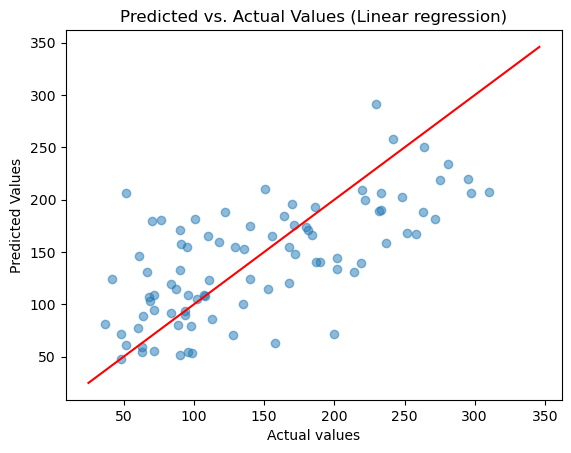

In [34]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear regression)")
plt.show()